In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.applications.mobilenet_v3 import preprocess_input, decode_predictions
from keras.applications import MobileNetV3Large

2024-05-28 17:45:14.211912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 17:45:14.833833: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
trained_model = MobileNetV3Large(weights='imagenet')

/home/grey/.local/lib/python3.10/site-packages/keras/src/applications/mobilenet_v3.py:512: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(
2024-05-28 17:45:15.313858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-28 17:45:15.318106: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
American_Staffordshire_terrier


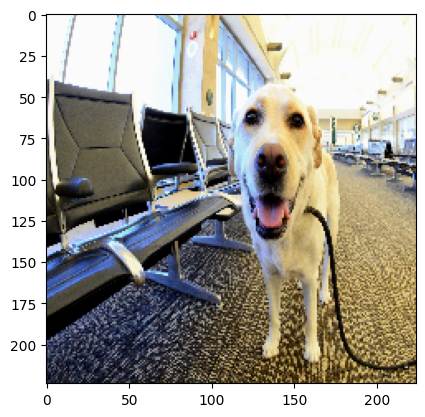

In [4]:
image = keras.preprocessing.image.load_img('../../../Pictures/dog.jpg', target_size=(224, 224))
arr = keras.utils.img_to_array(image)
arr = np.expand_dims(arr, axis=0)
prep = preprocess_input(arr)

plt.imshow(image)
# plt.imshow(prep)
plt.show

preds = trained_model.predict(prep)
print(decode_predictions(preds)[0][0][1])

In [5]:
# importing fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
# preprocessing the data


In [6]:
model = MobileNetV3Large()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("MobilenetV3large_1/Cast:0", shape=(32, 28, 28), dtype=float32). Expected shape (None, None, None, 3), but input has incompatible shape (32, 28, 28)[0m

Arguments received by Functional.call():
  • inputs=tf.Tensor(shape=(32, 28, 28), dtype=uint8)
  • training=True
  • mask=None